# Salary dataset - Salary Prediction

The salary dataset provides observations for each working individual and theier Salary. The problem statement entails predicting the salary of a working proffesional given the features such as year's of experience.

### About the data

- YearsExperience : Number of year's of experience the individual entails
- Salary : The salary of that individual

In [30]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\Users\User\Desktop\Projects\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [32]:
df.shape

(30, 2)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [34]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


- average year's of experience is 5 year's approx
- average salary is 76,003  approx

### Checking for null values

In [35]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There are no null values

### Checking for outlier's

In [38]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [39]:
data = df[(z<3).all(axis=1)]

In [40]:
df.shape,data.shape

((30, 2), (30, 2))

There are no outlier's in the data

# EDA

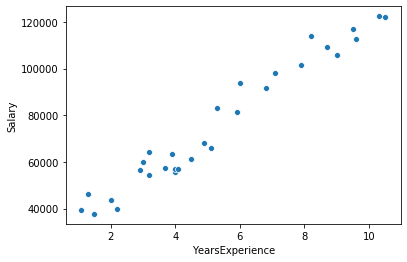

In [41]:
import seaborn as sns
sns.scatterplot(df['YearsExperience'],df['Salary'])

There is a visible linear relation between the two variable's.
This a Regression type problem

### Correlation matrix

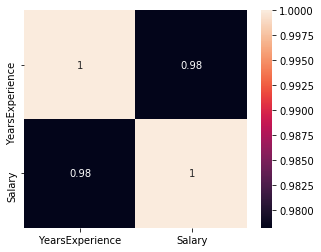

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_hmap = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_hmap,annot= True)
plt.show()

None of the variable's behave negatively wit the target variable 

### Checking for skewness

In [43]:
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

data is not much skewed

# Model Building

In [44]:
x = data.drop(columns=['Salary'])
y = data[['Salary']]

In [45]:
x.shape,y.shape

((30, 1), (30, 1))

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
x_train.shape, x_test.shape , y_train.shape ,y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lm.coef_

array([[9462.878838]])

In [28]:
lm.intercept_

array([25575.31161225])

In [29]:
lm.score(x_train,y_train)

0.9464278082328255

In [24]:
# Predict the values
pred = lm.predict(x_test)
print('Predicted price:',pred)
print('Actual price:',y_test)

Predicted price: [[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]
Actual price:       Salary
27  112635.0
15   67938.0
23  113812.0
17   83088.0
8    64445.0
9    57189.0


In [25]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))

print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean Absolute Error: 6286.453830757749
Mean Squared Error: 49830096.85590839
Root Mean Square Error: 7059.04362190151


In [26]:
# r2 score -> coefficient of determination
# i.e change in y whenever x is changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9024461774180497


In [27]:
# predict the house price by providing the values
t = np.array([15])

In [28]:
t = t.reshape(1,-1)

In [29]:
lm.predict(t)

array([[166678.81285724]])